In [318]:
import numpy as np
import pandas as pd
from simulate_matches import simulate_matches
from utils import *
from probabilities import *
import matplotlib.pyplot as plt
from scipy.special import comb

## Partida 1
Nessa partida, $p=0.75$ e, consequentemente, $q=0.25$

In [356]:
p1 = 0.75
simulate_matches('matches_1.csv', p1, 120)
df_1 = pd.read_csv('matches_1.csv')

120 0


### Caracterização inicial

In [195]:
a, b = matches_won(df_1)

print(f'A won {100*a/(a+b):.2f}% matches')
print(f'B won {100*b/(a+b):.2f}% matches')

A won 100.00% matches
B won 0.00% matches


In [196]:
a, b = sets_won(df_1)

print(f'A won {100*a/(a+b):.2f}% of the sets')
print(f'B won {100*b/(a+b):.2f}% of the sets')

A won 100.00% of the sets
B won 0.00% of the sets


In [197]:
a, b = games_won(df_1)

print(f'A won {100*a/(a+b):.2f}% of the games')
print(f'B won {100*b/(a+b):.2f}% of the games')

A won 94.80% of the games
B won 5.20% of the games


In [198]:
a, b = points_scored(df_1)

print(f'A scored {100*a/(a+b):.2f}% of the points')
print(f'B scored {100*b/(a+b):.2f}% of the points')

A scored 75.10% of the points
B scored 24.90% of the points


### Análise das vitórias dos jogadores

Vamos fazer uma análise da probabilidade de cada jogador ganhar na partida 1. Para isso, vamos dividir o nosso dataset em 3 e verificar, de 3 em 3 partidas, quantas o jogador A e o jogador B ganham:

In [199]:
n = len(df_1['match'].unique())//3

won_a = np.ndarray(n, dtype=int)
won_b = np.ndarray(n, dtype=int)

for i in range(n):
    matches = df_1[df_1['match'].isin([3*i, 3*i+1, 3*i+2])]
    (won_a[i], won_b[i]) = matches_won(matches)

print(f'Player A won {np.sum(won_a)} and Player B won {np.sum(won_b)}')

Player A won 120 and Player B won 0


Vamos calcular o valor médio de vitórias a cada 3 partidas, assim como o desvio padrão para a nossa amostra

In [200]:
print(f'A\'s average: {np.mean(won_a)}\nA\'s standard deviation: {np.std(won_a)}')
print(f'B\'s average: {np.mean(won_b)}\nB\'s standard deviation: {np.std(won_b)}')

A's average: 3.0
A's standard deviation: 0.0
B's average: 0.0
B's standard deviation: 0.0


Como podemos ver, em 3 partidas, é esperado que o jogador A ganhe as 3, enquanto o jogador B não ganha nenhuma. Em ambos os casos, o desvio padrão é 0, o que significa que A ou ganha as 3 partidas sempre ou que ele ganha com tanta frequência que a nossa amostra não foi capaz de capturar um caso em que ele perde. O mesmo vale para B.

### Probabilidades analíticas

Vamos analisar o jogo como uma Cadeia de Markov e calcular a probabilidade real dos jogadores ganharem as partidas:

In [358]:
pa1 = match_probability(p=p1)
pb1 = 1-pa1
print(f'Probability of A to win a match: {pa1}')
print(f'Probability of B to win a match: {pb1}')

Probability of A to win a match: 0.9999999999999997
Probability of B to win a match: 3.3306690738754696e-16


A probabilidade de um jogador ganhar a partida é dada por $ \mu = \sum {x_i*P(x_i)} $, sendo que $P(x_i)$ é a probabilidade do jogador ganhar um número $x_i$ de partidas (nesse caso, $x_i = i$). Essas probabilidade são, para o jogador A e B respectivamente, dadas pelas seguintes expressões:

$$ P_A(x_i) = \binom{3}{i}(1-p_a)^{3-i}*p_a^i,\space i=0,1,2,3 $$
$$ P_B(x_i) = \binom{3}{i}(1-p_a)^i*p_a^{3-i},\space i=0,1,2,3 $$

Onde $p_a$ é a probabilidade do jogador A ganhar uma partida. O desvio padrão é dado por $ \sigma = \sqrt { \sum {(x_i - \mu)^2*P(x_i)} } $, onde $\mu$ é o valor médio do número de partidas ganhas.

Vamos, então, computar os valores médios e desvios padrões reais para A e B:

In [359]:
x = [0, 1, 2, 3]
pa = [prob_n_outof(xi, 3, pa1) for xi in x]
pb = list(reversed(pa))

mean_a = np.sum([xi*pi for pi,xi in zip(pa,x)])
mean_b = np.sum([xi*pi for pi,xi in zip(pb,x)])


std_a = (np.sum([ (xi - mean_a)**2*pi for pi,xi in zip(pa,x) ]))**0.5
std_b = (np.sum([ (xi - mean_b)**2*pi for pi,xi in zip(pb,x) ]))**0.5

print(f'A\'s real average: {mean_a:.4e}\nA\'s real standard deviation: {std_a:.4e}')
print(f'B\'s real average: {mean_b:.4e}\nB\'s real standard deviation: {std_b:.4e}')

A's real average: 3.0000e+00
A's real standard deviation: 3.1610e-08
B's real average: 9.9920e-16
B's real standard deviation: 3.1610e-08


Percebemos que, realmente, o valor médio de partidas ganhas é muito próximo de 3 para A e muito próximo de 0 para B. O desvio padrão para ambos é, também, muito próximo de 0.

Vamos observar a relação entre $p$ e $p_a$ (além da probabilidade de se ganhar um game e um set):

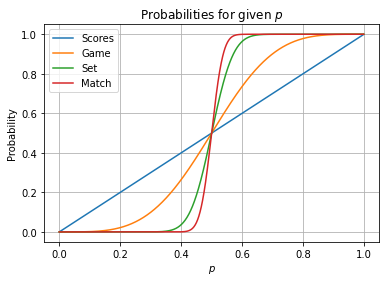

In [251]:
ps = np.arange(0, 1, 0.001)
pas = np.array([match_probability(p) for p in ps])
pss = np.array([set_probability(p) for p in ps])
pgs = np.array([game_probability(p) for p in ps])

fig, ax = plt.subplots()
ax.plot(ps, ps, label='Scores');
ax.plot(ps, pgs, label='Game');
ax.plot(ps, pss, label='Set');
ax.plot(ps, pas, label='Match');

ax.legend();
ax.set_title('Probabilities for given $p$');
ax.set_xlabel('$p$');
ax.set_ylabel('Probability');
ax.grid()

Como podemos ver, a probabilidade do jogador ganhar a partida é extremamente sensível à diferença de habilidade dos jogadores $p$. Além disso, percebemos que a sensibilidade à $p$ aumenta quando observamos a probabilidade de se ganhar um ponto, um jogo e um set.

## Partida 2
Agora, $p=0.5$ e $q=0.5$

In [360]:
p2 = 0.52
simulate_matches('matches_2.csv', p2, 120)
df_2 = pd.read_csv('matches_2.csv')

83 37


### Caracterização inicial

In [361]:
a, b = matches_won(df_2)

print(f'A won {100*a/(a+b):.2f}% of the matches')
print(f'B won {100*b/(a+b):.2f}% of the matches')

A won 69.17% of the matches
B won 30.83% of the matches


In [362]:
a, b = sets_won(df_2)

print(f'A won {100*a/(a+b):.2f}% of the sets')
print(f'B won {100*b/(a+b):.2f}% of the sets')

A won 62.13% of the sets
B won 37.87% of the sets


In [363]:
a, b = games_won(df_2)

print(f'A won {100*a/(a+b):.2f}% of the games')
print(f'B won {100*b/(a+b):.2f}% of the games')

A won 55.24% of the games
B won 44.76% of the games


In [364]:
a, b = points_scored(df_2)

print(f'A scored {100*a/(a+b):.2f}% of the points')
print(f'B scored {100*b/(a+b):.2f}% of the points')

A scored 52.10% of the points
B scored 47.90% of the points


### Análise do número de vitórias para a partida 2

In [365]:
n = len(df_2['match'].unique())//3

won_a = np.ndarray(n, dtype=int)
won_b = np.ndarray(n, dtype=int)

for i in range(n):
    matches = df_2[df_2['match'].isin([3*i, 3*i+1, 3*i+2])]
    (won_a[i], won_b[i]) = matches_won(matches)

print(f'Player A won {np.sum(won_a)} and Player B won {np.sum(won_b)}')

Player A won 83 and Player B won 37


Vamos verificar a média de vitórias em cada 3 partidas para $p=0.52$

In [366]:
print(f'A\'s average: {np.mean(won_a):.4f}\nA\'s standard deviation: {np.std(won_a):.4f}')
print(f'B\'s average: {np.mean(won_b):.4f}\nB\'s standard deviation: {np.std(won_b):.4f}')

A's average: 2.0750
A's standard deviation: 0.7546
B's average: 0.9250
B's standard deviation: 0.7546


Percebemos que, agora, os dois jogadores possuem habilidades bem similares, o que significa que o jogador B possui muito mais chances de vencer. Ainda assim, o jogador A possui muita vantagem em cima do jogador B, ganhando 2 em 3 partidas.

### Valores reais de probabilidade

Novamente, vamos calcular analiticamente a média de jogos ganhos dentre os 3:

In [368]:
p2a = match_probability(p=0.52)
p2b = 1-p2a
print(f'Probability of A to win a match: {p2a:.4f}')
print(f'Probability of B to win a match: {p2b:.4f}')

Probability of A to win a match: 0.7493
Probability of B to win a match: 0.2507


In [369]:
x = [0, 1, 2, 3]
pa = [prob_n_outof(xi, 3, p2a) for xi in x]
pb = list(reversed(pa))

mean_a = np.sum([xi*pi for pi,xi in zip(pa,x)])
mean_b = np.sum([xi*pi for pi,xi in zip(pb,x)])


std_a = (np.sum([ (xi - mean_a)**2*pi for pi,xi in zip(pa,x) ]))**0.5
std_b = (np.sum([ (xi - mean_b)**2*pi for pi,xi in zip(pb,x) ]))**0.5

print(f'A\'s real average: {mean_a:.4f}\nA\'s real standard deviation: {std_a:.4f}')
print(f'B\'s real average: {mean_b:.4f}\nB\'s real standard deviation: {std_b:.4f}')

A's real average: 2.2478
A's real standard deviation: 0.7507
B's real average: 0.7522
B's real standard deviation: 0.7507


Percebemos que os valores obtidos da análise da simulação é bem próximo do que foi obtido analiticamente.

Novamente, observamos a sensibilidade da vitória à probabilidade $p$. Com uma diferença de apenas $0.04$ de habilidade, o jogador A consegue vencer pelo menos duas partidas em cada 3.